/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.85606e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


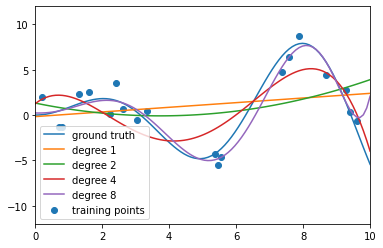

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)+ 2.0 * (2.0 * np.random.rand(20) - 1.0)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]

plt.plot(x_plot, f(x_plot), label="ground truth")
plt.scatter(x, y, label="training points")

for degree in [1, 2, 4, 8]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1))
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, label="degree %d" % degree)

plt.legend(loc='lower left')
plt.axis([0, 10, -12, 12])

plt.show()

